## Fine tunning NN hyperparameters

Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.
 
- hidden layers
- neurons per layers
- learning rate
- optimizer
- Batch size
- activation Function
- No of epoches


### Problem other than hyperparameter tunning
- Vanishing / Explodeing Gradient
- Not enought Data
- slow training
- Overfitting

### No of hidden layers
- Rather than having small layer having more neurons, its better to have more hidden layers with small no of neurons which is effect of representation learning.
     - Representation learning is a class of machine learning approaches that allow a system to discover the representations required for feature detection or classification from raw data. The requirement for manual feature engineering is reduced by allowing a machine to learn the features and apply them to a given activity.
     
- we can put as much as posible hidden layes untill onver fitting     
     - Tranfer learning : Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.[1] For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks. This area of research bears some relation to the long history of psychological literature on transfer of learning, although practical ties between the two fields are limited. From the practical standpoint, reusing or transferring information from previously learned tasks for the learning of new tasks has the potential to significantly improve the sample efficiency of a reinforcement learning agent.

### How much Neurons in hidden layers
- Earlier researchers used to put pyramid shape structure Neural netwoeks but its not an efficient one.
- No of neuronsst be suffucient i.e. with repect to primitive feature 

# Early stopping
- In machine learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration.

- If we take more epoches then the model will overfit.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [4]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<AxesSubplot: >

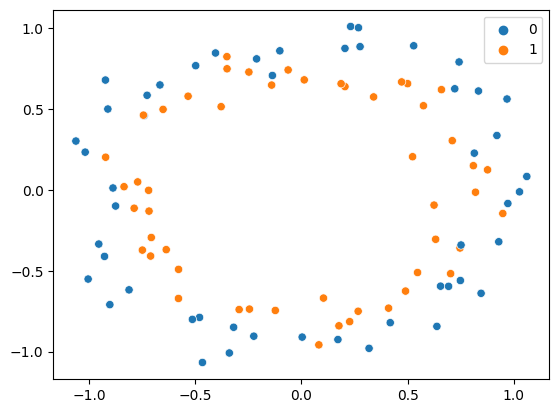

In [13]:
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

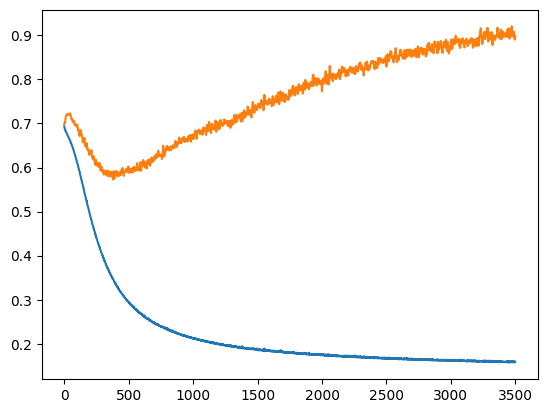

In [15]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

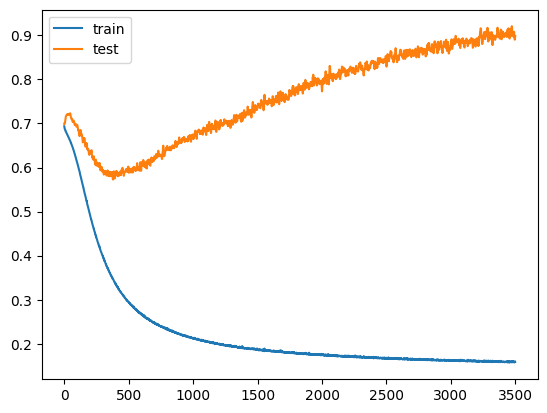

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 17s 2ms/step


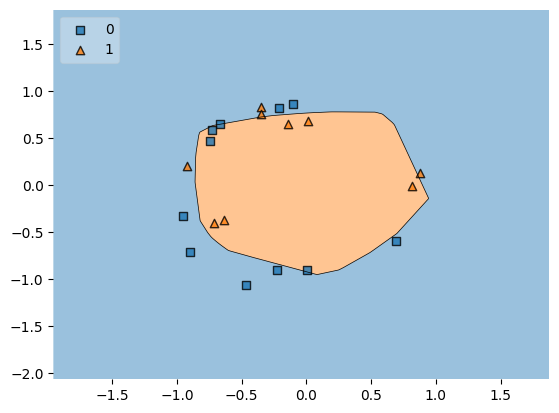

In [18]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

## Early Stopping

In [19]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 162ms/step - loss: 0.7025 - accuracy: 0.4625 - val_loss: 0.6835 - val_accuracy: 0.5500
Epoch 2/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.6990 - accuracy: 0.4625 - val_loss: 0.6839 - val_accuracy: 0.5500
Epoch 3/3500
3/3 [==============================] - 0s 32ms/step - loss: 0.6974 - accuracy: 0.4750 - val_loss: 0.6852 - val_accuracy: 0.5500
Epoch 4/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.6955 - accuracy: 0.4625 - val_loss: 0.6876 - val_accuracy: 0.6000
Epoch 5/3500
3/3 [==============================] - 0s 29ms/step - loss: 0.6944 - accuracy: 0.4875 - val_loss: 0.6899 - val_accuracy: 0.6000
Epoch 6/3500
3/3 [==============================] - 0s 23ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 7/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.6917 - accuracy: 0.5625 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 8/3500

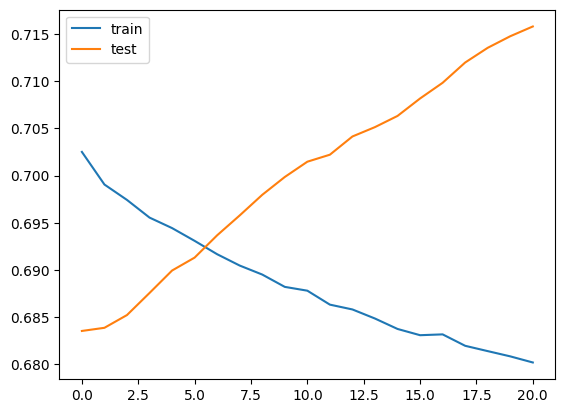

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 17s 2ms/step


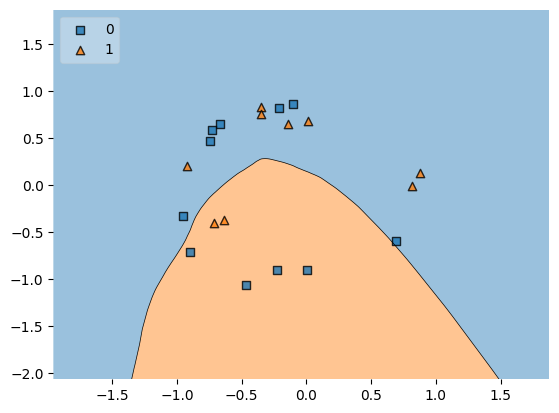

In [22]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

### Early stopping patrameter
monitor:"val_loss",
min_delta= min chane in monitor quality,
patients:no of epoches to stop,
verbose:
mode:"auto","min,"max",
basline:
restore_best_weights:

## Droupout of neural netweorks

In deep learning neural networks due to presence of  deep hidden layers of neurons the formeed model leads to  overfitting to overcome it  we drop certian neurons in neural networks.

- Another way of overcoming the problem above to add morev data as possible.
- overfitting can be  overcome by reduce the complexity of the model i.e. using less no of neuron in eah hidden layers and also using early stopping, regularization.

### The concept of dropout

The term “dropout” refers to dropping out the nodes (input and hidden layer) in a neural network (as seen in Figure 1). All the forward and backwards connections with a dropped node are temporarily removed, thus creating a new network architecture out of the parent network. The nodes are dropped by a dropout probability of p

<img src="https://miro.medium.com/max/720/1*iWQzxhVlvadk6VAJjsgXgg.webp">

Some Observations:
- Dropout forces a neural network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.
- Dropout roughly doubles the number of iterations required to converge. However, training time for each epoch is less.
- With H hidden units, each of which can be dropped, we have
- 2^H possible models. In testing phase, the entire network is considered and each activation is reduced by a factor p.


## Practical implementation of dropout

-  dropout ratio p increaae if overfitting and viz. in case of  underfitting
-  dropout must start from last layers
- in case of cnn d_ratio- 40-50%
- in case of rnn d_ratio- 20-30%
- in case of rnn d_ratio- 10-50%

## Draw backs
- convergence in delay  in used of dropouts
- loss function and cost function value changes in each epochs.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [9]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

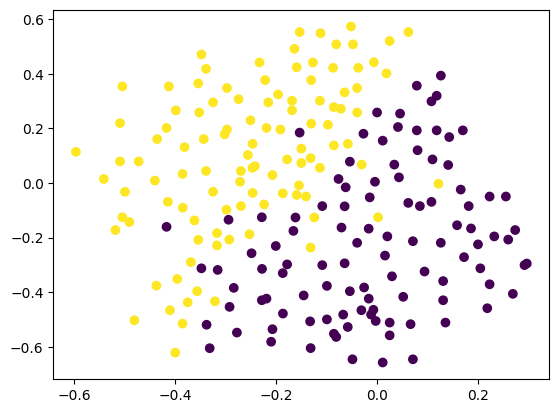

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [12]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 2s 106ms/step - loss: 0.5886 - accuracy: 0.7143 - val_loss: 0.5696 - val_accuracy: 0.6744
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2879 - accuracy: 0.8988 - val_loss: 0.5969 - val_accuracy: 0.6977
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2439 - accuracy: 0.8869 - val_loss: 0.3933 - val_accuracy: 0.8372
Epoch 4/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2550 - accuracy: 0.9048 - val_loss: 0.3300 - val_accuracy: 0.8837
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2286 - accuracy: 0.9107 - val_loss: 0.4379 - val_accuracy: 0.7907
Epoch 6/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2253 - accuracy: 0.9107 - val_loss: 0.4428 - val_accuracy: 0.8140
Epoch 7/500
6/6 [==============================] - 0s 19ms/step - loss: 0.2155 - accuracy: 0.9167 - val_loss: 0.3965 - val_accuracy: 0.8372
Epoch 8/500
6/6 [==

6/6 [==============================] - 0s 14ms/step - loss: 0.1712 - accuracy: 0.9107 - val_loss: 0.6076 - val_accuracy: 0.8605
Epoch 60/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2025 - accuracy: 0.9107 - val_loss: 0.6538 - val_accuracy: 0.7907
Epoch 61/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1533 - accuracy: 0.9405 - val_loss: 0.5149 - val_accuracy: 0.8605
Epoch 62/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1662 - accuracy: 0.9226 - val_loss: 0.4851 - val_accuracy: 0.8605
Epoch 63/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1416 - accuracy: 0.9405 - val_loss: 0.4876 - val_accuracy: 0.8372
Epoch 64/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1391 - accuracy: 0.9405 - val_loss: 0.4993 - val_accuracy: 0.8837
Epoch 65/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1412 - accuracy: 0.9405 - val_loss: 0.6473 - val_accuracy: 0.8372
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 13ms/step - loss: 0.1272 - accuracy: 0.9464 - val_loss: 0.7419 - val_accuracy: 0.8140
Epoch 118/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1068 - accuracy: 0.9583 - val_loss: 0.7676 - val_accuracy: 0.8140
Epoch 119/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0950 - accuracy: 0.9643 - val_loss: 0.8804 - val_accuracy: 0.8372
Epoch 120/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0967 - accuracy: 0.9524 - val_loss: 0.9113 - val_accuracy: 0.8372
Epoch 121/500
6/6 [==============================] - 0s 25ms/step - loss: 0.1009 - accuracy: 0.9524 - val_loss: 0.7612 - val_accuracy: 0.8605
Epoch 122/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0921 - accuracy: 0.9524 - val_loss: 0.7356 - val_accuracy: 0.8605
Epoch 123/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0891 - accuracy: 0.9702 - val_loss: 0.9374 - val_accuracy: 0.7907
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1192 - accuracy: 0.9405 - val_loss: 1.1822 - val_accuracy: 0.7674
Epoch 176/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1075 - accuracy: 0.9583 - val_loss: 0.9509 - val_accuracy: 0.7907
Epoch 177/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1058 - accuracy: 0.9643 - val_loss: 1.3888 - val_accuracy: 0.7209
Epoch 178/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0990 - accuracy: 0.9583 - val_loss: 1.3756 - val_accuracy: 0.8140
Epoch 179/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1246 - accuracy: 0.9524 - val_loss: 1.1608 - val_accuracy: 0.8372
Epoch 180/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0802 - accuracy: 0.9762 - val_loss: 1.1845 - val_accuracy: 0.7674
Epoch 181/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0999 - accuracy: 0.9583 - val_loss: 1.2667 - val_accuracy: 0.8140
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0733 - accuracy: 0.9762 - val_loss: 1.6040 - val_accuracy: 0.7209
Epoch 234/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0614 - accuracy: 0.9762 - val_loss: 1.4584 - val_accuracy: 0.7674
Epoch 235/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0640 - accuracy: 0.9702 - val_loss: 1.4930 - val_accuracy: 0.7442
Epoch 236/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0736 - accuracy: 0.9821 - val_loss: 1.5994 - val_accuracy: 0.6744
Epoch 237/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0705 - accuracy: 0.9762 - val_loss: 1.5199 - val_accuracy: 0.7209
Epoch 238/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0625 - accuracy: 0.9881 - val_loss: 1.7458 - val_accuracy: 0.6279
Epoch 239/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0749 - accuracy: 0.9702 - val_loss: 1.4778 - val_accuracy: 0.7442
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1643 - accuracy: 0.9524 - val_loss: 1.8240 - val_accuracy: 0.6744
Epoch 292/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1066 - accuracy: 0.9643 - val_loss: 1.3978 - val_accuracy: 0.7442
Epoch 293/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0958 - accuracy: 0.9583 - val_loss: 1.8125 - val_accuracy: 0.7209
Epoch 294/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0712 - accuracy: 0.9702 - val_loss: 1.6181 - val_accuracy: 0.7442
Epoch 295/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0889 - accuracy: 0.9643 - val_loss: 1.1580 - val_accuracy: 0.8140
Epoch 296/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1563 - accuracy: 0.9583 - val_loss: 2.5740 - val_accuracy: 0.6744
Epoch 297/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1320 - accuracy: 0.9643 - val_loss: 1.8893 - val_accuracy: 0.6744
Epoch 

Epoch 349/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1141 - accuracy: 0.9345 - val_loss: 2.2022 - val_accuracy: 0.6047
Epoch 350/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1349 - accuracy: 0.9583 - val_loss: 1.6541 - val_accuracy: 0.7674
Epoch 351/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1764 - accuracy: 0.9524 - val_loss: 3.0754 - val_accuracy: 0.6977
Epoch 352/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1851 - accuracy: 0.9345 - val_loss: 2.2867 - val_accuracy: 0.6047
Epoch 353/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1545 - accuracy: 0.9405 - val_loss: 1.3992 - val_accuracy: 0.7907
Epoch 354/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2868 - accuracy: 0.9226 - val_loss: 3.1834 - val_accuracy: 0.5116
Epoch 355/500
6/6 [==============================] - 0s 12ms/step - loss: 0.3545 - accuracy: 0.9226 - val_loss: 1.5544 - val_accuracy: 0.7209
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0475 - accuracy: 0.9762 - val_loss: 1.9857 - val_accuracy: 0.7674
Epoch 408/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.9940 - val_loss: 2.0263 - val_accuracy: 0.7442
Epoch 409/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0346 - accuracy: 0.9881 - val_loss: 1.9676 - val_accuracy: 0.7674
Epoch 410/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.9940 - val_loss: 1.9813 - val_accuracy: 0.7674
Epoch 411/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0361 - accuracy: 0.9881 - val_loss: 2.0356 - val_accuracy: 0.7674
Epoch 412/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 2.1184 - val_accuracy: 0.7674
Epoch 413/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0338 - accuracy: 0.9881 - val_loss: 2.0725 - val_accuracy: 0.7674
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0304 - accuracy: 0.9821 - val_loss: 2.0518 - val_accuracy: 0.7442
Epoch 466/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0361 - accuracy: 0.9881 - val_loss: 2.1497 - val_accuracy: 0.7442
Epoch 467/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0299 - accuracy: 0.9881 - val_loss: 2.1984 - val_accuracy: 0.7442
Epoch 468/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 2.2118 - val_accuracy: 0.7442
Epoch 469/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0290 - accuracy: 0.9881 - val_loss: 2.2751 - val_accuracy: 0.7442
Epoch 470/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0300 - accuracy: 0.9940 - val_loss: 2.2191 - val_accuracy: 0.7442
Epoch 471/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.9881 - val_loss: 2.2335 - val_accuracy: 0.7209
Epoch 

In [13]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 19s 2ms/step


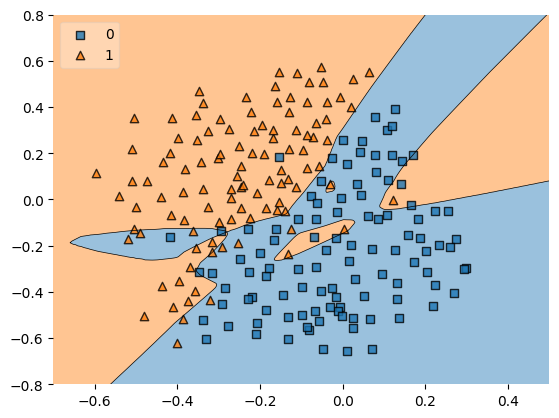

In [14]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

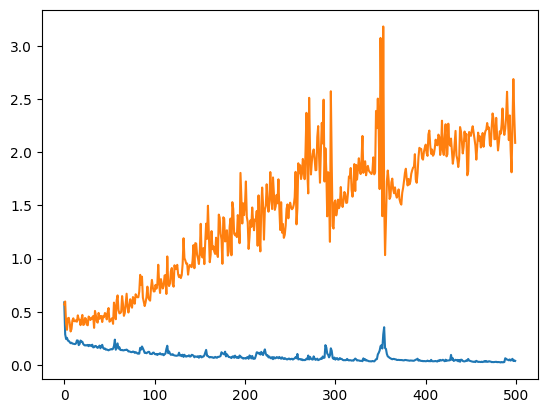

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

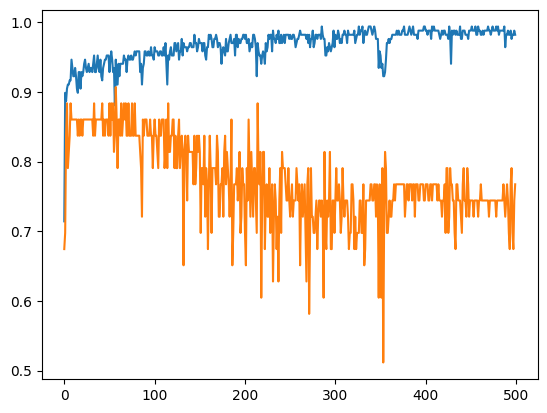

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [17]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 2s 67ms/step - loss: 0.5665 - accuracy: 0.8214 - val_loss: 0.6212 - val_accuracy: 0.6047
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2864 - accuracy: 0.8929 - val_loss: 0.6348 - val_accuracy: 0.7209
Epoch 3/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2592 - accuracy: 0.8929 - val_loss: 0.4748 - val_accuracy: 0.7442
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 0.3062 - accuracy: 0.8690 - val_loss: 0.3354 - val_accuracy: 0.8605
Epoch 5/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2596 - accuracy: 0.9048 - val_loss: 0.3613 - val_accuracy: 0.8605
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2549 - accuracy: 0.9048 - val_loss: 0.3924 - val_accuracy: 0.8140
Epoch 7/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2135 - accuracy: 0.9226 - val_loss: 0.4400 - val_accuracy: 0.8140
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 20ms/step - loss: 0.1946 - accuracy: 0.9345 - val_loss: 0.4427 - val_accuracy: 0.8605
Epoch 60/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1918 - accuracy: 0.9226 - val_loss: 0.4134 - val_accuracy: 0.8605
Epoch 61/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1923 - accuracy: 0.9167 - val_loss: 0.4038 - val_accuracy: 0.8605
Epoch 62/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1738 - accuracy: 0.9345 - val_loss: 0.4547 - val_accuracy: 0.8605
Epoch 63/500
6/6 [==============================] - 0s 18ms/step - loss: 0.2112 - accuracy: 0.9048 - val_loss: 0.4080 - val_accuracy: 0.8605
Epoch 64/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2197 - accuracy: 0.9167 - val_loss: 0.3888 - val_accuracy: 0.8605
Epoch 65/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1908 - accuracy: 0.9226 - val_loss: 0.4127 - val_accuracy: 0.8605
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 19ms/step - loss: 0.1842 - accuracy: 0.9226 - val_loss: 0.4287 - val_accuracy: 0.8605
Epoch 118/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1836 - accuracy: 0.9107 - val_loss: 0.4994 - val_accuracy: 0.8605
Epoch 119/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1845 - accuracy: 0.9226 - val_loss: 0.5689 - val_accuracy: 0.8605
Epoch 120/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1963 - accuracy: 0.9107 - val_loss: 0.5620 - val_accuracy: 0.8605
Epoch 121/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1840 - accuracy: 0.9286 - val_loss: 0.5697 - val_accuracy: 0.8605
Epoch 122/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1725 - accuracy: 0.9345 - val_loss: 0.4737 - val_accuracy: 0.8605
Epoch 123/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1791 - accuracy: 0.9286 - val_loss: 0.4712 - val_accuracy: 0.8605
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1636 - accuracy: 0.9345 - val_loss: 0.6050 - val_accuracy: 0.8372
Epoch 176/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1959 - accuracy: 0.9167 - val_loss: 0.5023 - val_accuracy: 0.8605
Epoch 177/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2050 - accuracy: 0.9226 - val_loss: 0.4706 - val_accuracy: 0.8605
Epoch 178/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2030 - accuracy: 0.9286 - val_loss: 0.6318 - val_accuracy: 0.8372
Epoch 179/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1733 - accuracy: 0.9464 - val_loss: 0.4958 - val_accuracy: 0.8605
Epoch 180/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1799 - accuracy: 0.9286 - val_loss: 0.4542 - val_accuracy: 0.8837
Epoch 181/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1734 - accuracy: 0.9286 - val_loss: 0.4667 - val_accuracy: 0.8837
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1553 - accuracy: 0.9524 - val_loss: 0.6349 - val_accuracy: 0.8605
Epoch 234/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1415 - accuracy: 0.9524 - val_loss: 0.6348 - val_accuracy: 0.8605
Epoch 235/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1540 - accuracy: 0.9464 - val_loss: 0.6672 - val_accuracy: 0.8605
Epoch 236/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1469 - accuracy: 0.9524 - val_loss: 0.7232 - val_accuracy: 0.8372
Epoch 237/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1584 - accuracy: 0.9345 - val_loss: 0.6985 - val_accuracy: 0.8372
Epoch 238/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1572 - accuracy: 0.9345 - val_loss: 0.6608 - val_accuracy: 0.8605
Epoch 239/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1439 - accuracy: 0.9405 - val_loss: 0.7802 - val_accuracy: 0.8605
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1514 - accuracy: 0.9405 - val_loss: 0.5600 - val_accuracy: 0.8837
Epoch 292/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1527 - accuracy: 0.9464 - val_loss: 0.6006 - val_accuracy: 0.8605
Epoch 293/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1589 - accuracy: 0.9345 - val_loss: 0.6924 - val_accuracy: 0.8605
Epoch 294/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1333 - accuracy: 0.9524 - val_loss: 0.7250 - val_accuracy: 0.8372
Epoch 295/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1686 - accuracy: 0.9107 - val_loss: 0.6932 - val_accuracy: 0.8372
Epoch 296/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1658 - accuracy: 0.9345 - val_loss: 0.5064 - val_accuracy: 0.9070
Epoch 297/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1603 - accuracy: 0.9464 - val_loss: 0.4853 - val_accuracy: 0.9070
Epoch 

Epoch 349/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1923 - accuracy: 0.9167 - val_loss: 0.6683 - val_accuracy: 0.7907
Epoch 350/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1560 - accuracy: 0.9524 - val_loss: 0.6606 - val_accuracy: 0.8140
Epoch 351/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1514 - accuracy: 0.9286 - val_loss: 0.6620 - val_accuracy: 0.8605
Epoch 352/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1484 - accuracy: 0.9464 - val_loss: 0.6607 - val_accuracy: 0.8372
Epoch 353/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1442 - accuracy: 0.9405 - val_loss: 0.6429 - val_accuracy: 0.8605
Epoch 354/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2115 - accuracy: 0.9226 - val_loss: 0.5835 - val_accuracy: 0.8605
Epoch 355/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1716 - accuracy: 0.9345 - val_loss: 0.6036 - val_accuracy: 0.8372
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1538 - accuracy: 0.9286 - val_loss: 0.5953 - val_accuracy: 0.8837
Epoch 408/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1614 - accuracy: 0.9345 - val_loss: 0.6654 - val_accuracy: 0.8837
Epoch 409/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1600 - accuracy: 0.9286 - val_loss: 0.7584 - val_accuracy: 0.8372
Epoch 410/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1320 - accuracy: 0.9464 - val_loss: 0.7716 - val_accuracy: 0.8372
Epoch 411/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1706 - accuracy: 0.9167 - val_loss: 0.7617 - val_accuracy: 0.8372
Epoch 412/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1287 - accuracy: 0.9464 - val_loss: 0.7684 - val_accuracy: 0.8372
Epoch 413/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1949 - accuracy: 0.9405 - val_loss: 0.7435 - val_accuracy: 0.8372
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2302 - accuracy: 0.9345 - val_loss: 0.4935 - val_accuracy: 0.9070
Epoch 466/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1739 - accuracy: 0.9286 - val_loss: 0.5052 - val_accuracy: 0.8837
Epoch 467/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1771 - accuracy: 0.9405 - val_loss: 0.5884 - val_accuracy: 0.8837
Epoch 468/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1727 - accuracy: 0.9405 - val_loss: 0.7357 - val_accuracy: 0.8372
Epoch 469/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1677 - accuracy: 0.9226 - val_loss: 0.8538 - val_accuracy: 0.8372
Epoch 470/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1570 - accuracy: 0.9345 - val_loss: 0.9324 - val_accuracy: 0.8372
Epoch 471/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1810 - accuracy: 0.9226 - val_loss: 0.8167 - val_accuracy: 0.8605
Epoch 

9600/9600 [==============================] - 18s 2ms/step


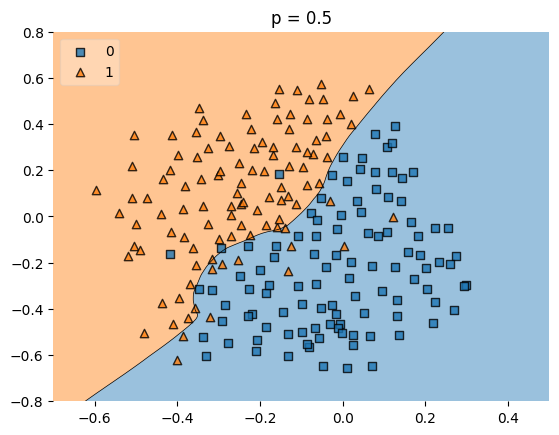

In [18]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

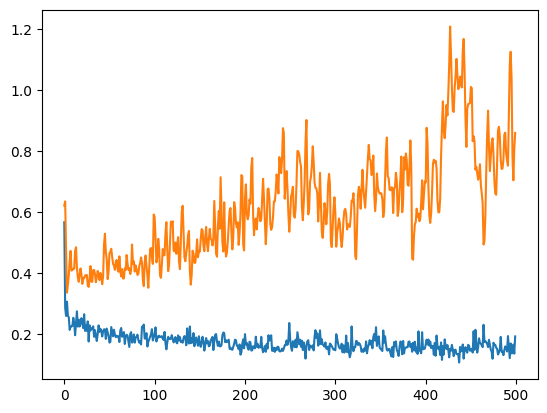

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

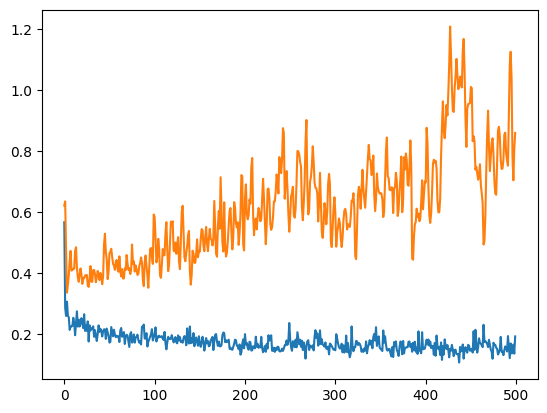

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])